# Quadratic Repair Cost

This notebook contains the code for solving for optimal controls in the linear model but with a quadratic repair cost such that the cost functional is:
$$ C = \int_0^T [\alpha r^2 - \phi] dt$$
The finite horizon case (where $T$ is finite) is in Figure S5 of the supplementary material. An infinite horizon approximation for the optimal repair protocol is also included in this notebook.

In [1]:
import numpy as np
from scipy.integrate import solve_bvp, odeint
import matplotlib.pyplot as plt


def diff_y (t, y, alpha, f):
    lambd, phi = y
    dydt = [1 + f*lambd + lambd**2*(phi-1)/(2*alpha), -lambd * (1-phi)**2 / (2*alpha) - f*phi]
    return (dydt)


def diff_y_tlast (y, t, alpha, f):
    lambd, phi = y
    dydt = [1 + f*lambd + lambd**2*(phi-1)/(2*alpha), -lambd * (1-phi)**2 / (2*alpha) - f*phi]
    return (dydt)

def bc(y0, y1, alpha, f):
    return [y0[1]-1, y1[0]]


def iterateAlpha (alpha_list, f, t_range, color_list=['r', 'g', 'b', 'm', 'k', 'c'], save='no'):
    
    t = np.linspace(t_range[0], t_range[1], t_range[2])
    ystart = np.zeros((2, t.size))
    
    r_t_list = []
    
    
    
    for i, alpha in enumerate(alpha_list):
        result = solve_bvp(lambda t, y: diff_y(t, y, alpha=alpha, f=f),
                           lambda y0, y1: bc(y0, y1, alpha=alpha, f=f),
                           t, ystart)

        lambd_t = np.array(result.y[0])
        phi_t = np.array(result.y[1])
        r_t = np.divide(np.multiply(lambd_t, np.subtract(phi_t, 1)),(2*alpha))
        r_t_list.append(r_t)
        plt.plot(t, r_t, label=r'$\alpha$ = ' + str(alpha), color=color_list[i], linewidth=1.5)
        
        if save != 'no':
            np.savetxt('Data/Quadratic/'+save+'_'+str(alpha)+'.csv', r_t, delimiter=",")
        
    #plt.legend(loc='best')
    plt.xlabel('Time, $t$', fontsize=18)
    plt.ylabel('Repair rate, $r(t)$', fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.tight_layout()
    if save != 'no':
        plt.savefig('Figures/Quadratic/'+save+'.png', dpi=800, bbox_inches='tight')
    plt.show()

## Finite Horizon Repair Protocol

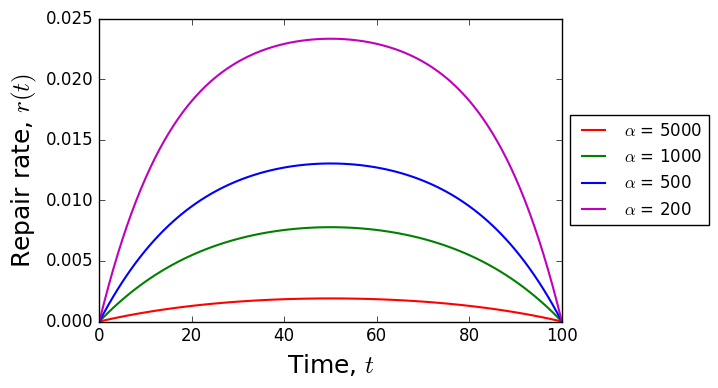

In [2]:
iterateAlpha ([5000, 1000, 500, 200], f=0.025, t_range=[0,100,101], save='alpha')

In [4]:
import numpy as np
from scipy.integrate import solve_bvp, odeint
import matplotlib.pyplot as plt


def diff_y (t, y, alpha, f, g):
    lambd, phi = y
    dydt = [1 + (f+g)*lambd + lambd**2*(phi-1)/(2*alpha), -lambd * (1-phi)**2 / (2*alpha) - (f+g)*phi]
    return (dydt)


def diff_y_tlast (y, t, alpha, f, g):
    lambd, phi = y
    dydt = [1 + (f+g)*lambd + lambd**2*(phi-1)/(2*alpha), -lambd * (1-phi)**2 / (2*alpha) - (f+g)*phi]
    return (dydt)

def bc(y0, y1, alpha, f, g):
    return [y0[1]-1, y1[0]]


def iterateAlpha (alpha_list, f, g, t_range, color_list=['r', 'g', 'b', 'm', 'k', 'c'], save='no'):
    
    t = np.linspace(t_range[0], t_range[1], t_range[2])
    ystart = np.zeros((2, t.size))
    
    r_t_list = []
    
    
    
    for i, alpha in enumerate(alpha_list):
        result = solve_bvp(lambda t, y: diff_y(t, y, alpha=alpha, f=f, g=g),
                           lambda y0, y1: bc(y0, y1, alpha=alpha, f=f, g=g),
                           t, ystart)

        lambd_t = np.array(result.y[0])
        phi_t = np.array(result.y[1])
        r_t = np.divide(np.multiply(lambd_t, np.subtract(phi_t, 1)),(2*alpha))
        r_t_list.append(r_t)
        plt.plot(t, r_t, label='alpha = ' + str(alpha), color=color_list[i])
        
        if save != 'no':
            np.savetxt('Data/Quadratic/'+save+'_'+str(alpha)+'.csv', r_t, delimiter=",")
        
    #plt.legend(loc='best')
    plt.xlabel('Time, $t$', fontsize=18)
    plt.ylabel('Repair rate, $r(t)$', fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.xlim(0,101)
    if save != 'no':
        plt.savefig('Figures/Quadratic/'+save+'.png', dpi=800)
    plt.show()
    
    
    
def iterateGamma (g_list, f, alpha, t_range, color_list=['r', 'g', 'b', 'm', 'k', 'c'], save='no'):
    
    t = np.linspace(t_range[0], t_range[1], t_range[2])
    ystart = np.zeros((2, t.size))
    
    r_t_list = []
    
    
    
    for i, g in enumerate(g_list):
        result = solve_bvp(lambda t, y: diff_y(t, y, alpha=alpha, f=f, g=g),
                           lambda y0, y1: bc(y0, y1, alpha=alpha, f=f, g=g),
                           t, ystart)

        lambd_t = np.array(result.y[0])
        phi_t = np.array(result.y[1])
        r_t = np.divide(np.multiply(lambd_t, np.subtract(phi_t, 1)),(2*alpha))
        r_t_list.append(r_t)
        plt.plot(t, r_t, label='$\gamma = $' + str(g), color=color_list[i])
        
        if save != 'no':
            np.savetxt('Data/Quadratic/'+save+'_'+str(g)+'_gamma.csv', r_t, delimiter=",")
        
    #plt.legend(loc='best')
    plt.xlabel('Time, $t$', fontsize=18)
    plt.ylabel('Repair rate, $r(t)$', fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.xlim(0,101)
    plt.legend(loc='best')
    if save != 'no':
        plt.savefig('Figures/Quadratic/'+save+'_gamma.png', dpi=800)
    plt.show()

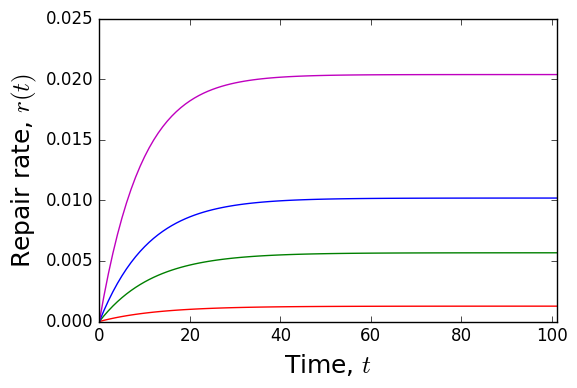

In [5]:
iterateAlpha ([5000, 1000, 500, 200], f=0.025, g=0.0513, t_range=[0,1000,1001], save='gamma')